<a href="https://colab.research.google.com/github/LeandroCoelhos/BeeData/blob/main/titanic/Projeto_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Leandro Coelho
<br>
Projeto Titanic<br>
Competição BeeData<br>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno


In [ ]:
url1 = 'https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/Titanic/train.csv'
url2 = 'https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/Titanic/test.csv'
treino = pd.read_csv(url1)
teste = pd.read_csv(url2) 

n = treino.shape[0]#armazenar o tamanho do dataset de treino

In [ ]:
print("Valores no Conjunto de TREINO:\n")
print(treino.info())

Valores no Conjunto de TREINO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print("Valores no Conjunto de TREINO:\n")
print(teste.info())

Valores no Conjunto de TREINO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [ ]:
#Separar variaveis categoricas das numericas
coluna_numerica = treino.columns[treino.dtypes != "object"] #Colunas de variáveis numericas
coluna_object = treino.columns[treino.dtypes == "object"] #Colunas do tipo numéricas

In [ ]:
#Verificar frequencia das categoricas
for i in coluna_object:
  print("Coluna: ",i)
  print(treino[i].value_counts(dropna=False), "\n")

Coluna:  Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

Coluna:  Sex
male      577
female    314
Name: Sex, dtype: int64 

Coluna:  Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 

Coluna:  Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7           

In [ ]:
#Verificar frequencia das numéricas
for i in coluna_numerica:
  print("Coluna: ",i)
  print(treino[i].value_counts(dropna=False), "\n")

Coluna:  PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64 

Coluna:  Survived
0    549
1    342
Name: Survived, dtype: int64 

Coluna:  Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64 

Coluna:  Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64 

Coluna:  SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 

Coluna:  Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 

Coluna:  Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64 



<ipython-input-19-f1e62c4ca8dc>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i)


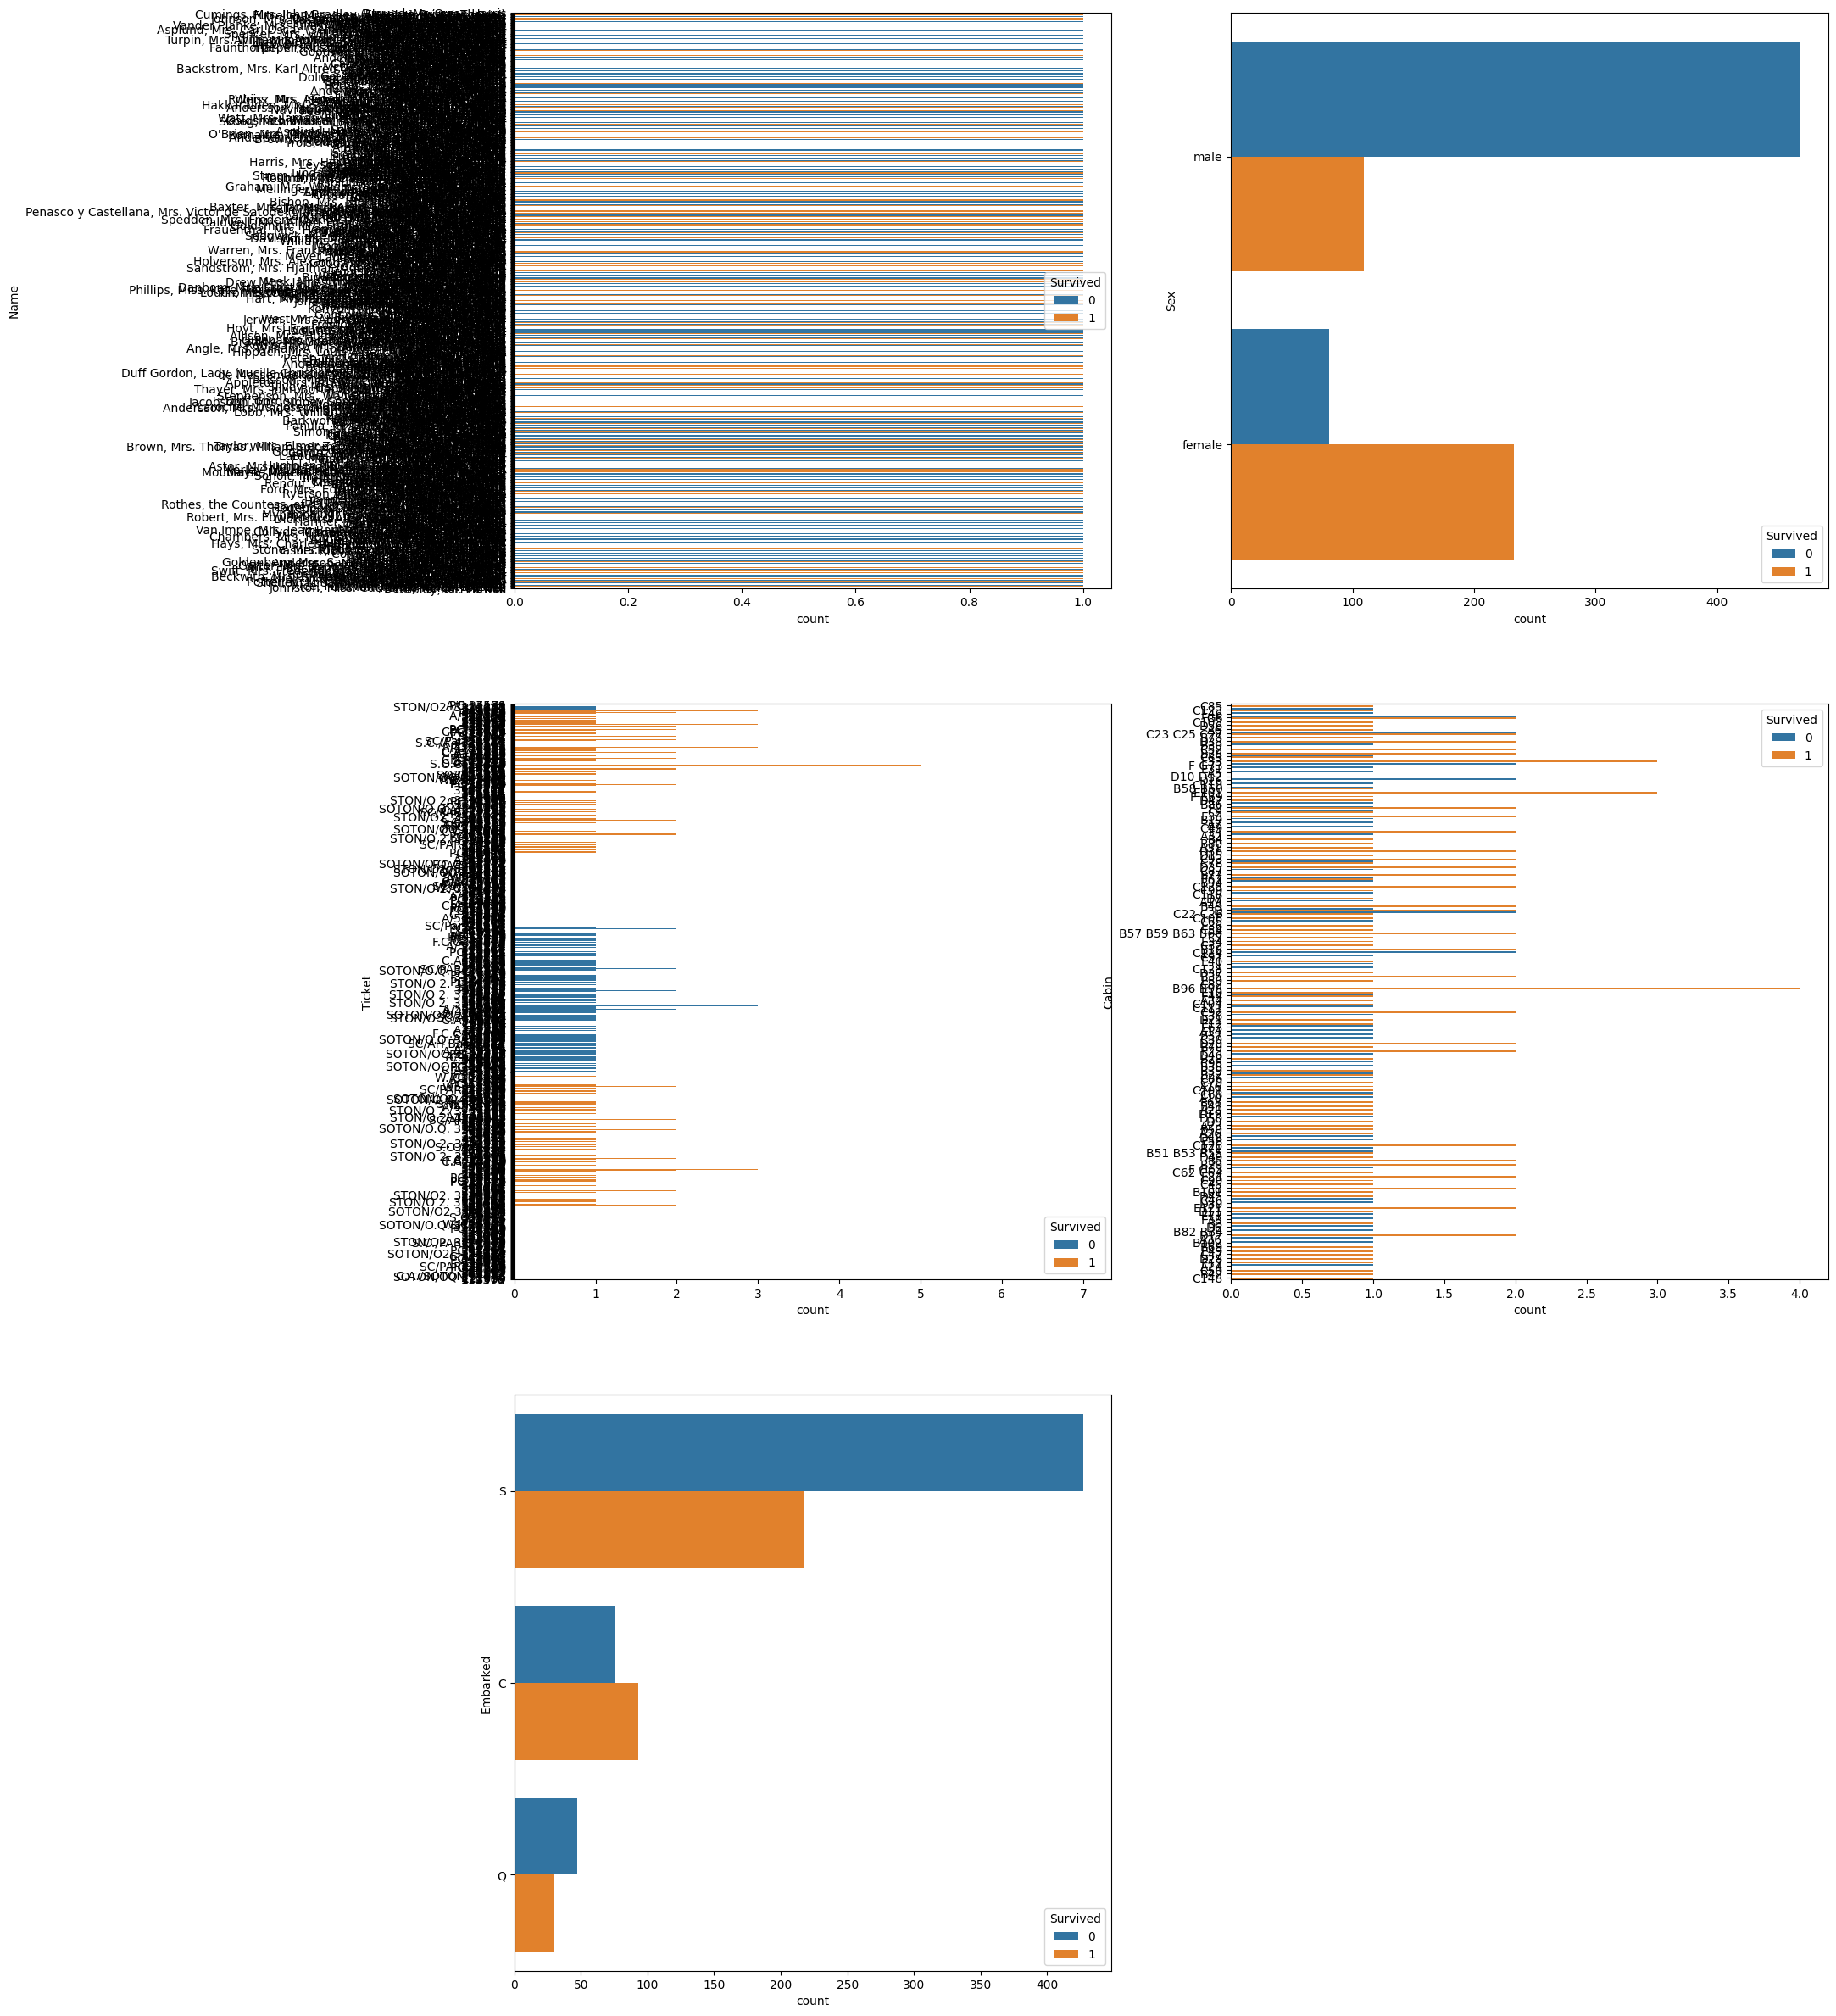

In [ ]:
f, ax = plt.subplots(figsize=(20, 30))
for i in range(1,6):
  plt.subplot(3,2,i)
  sns.countplot(data = treino, y=coluna_object[i-1], hue='Survived')

<ipython-input-21-75c456db7d54>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i)


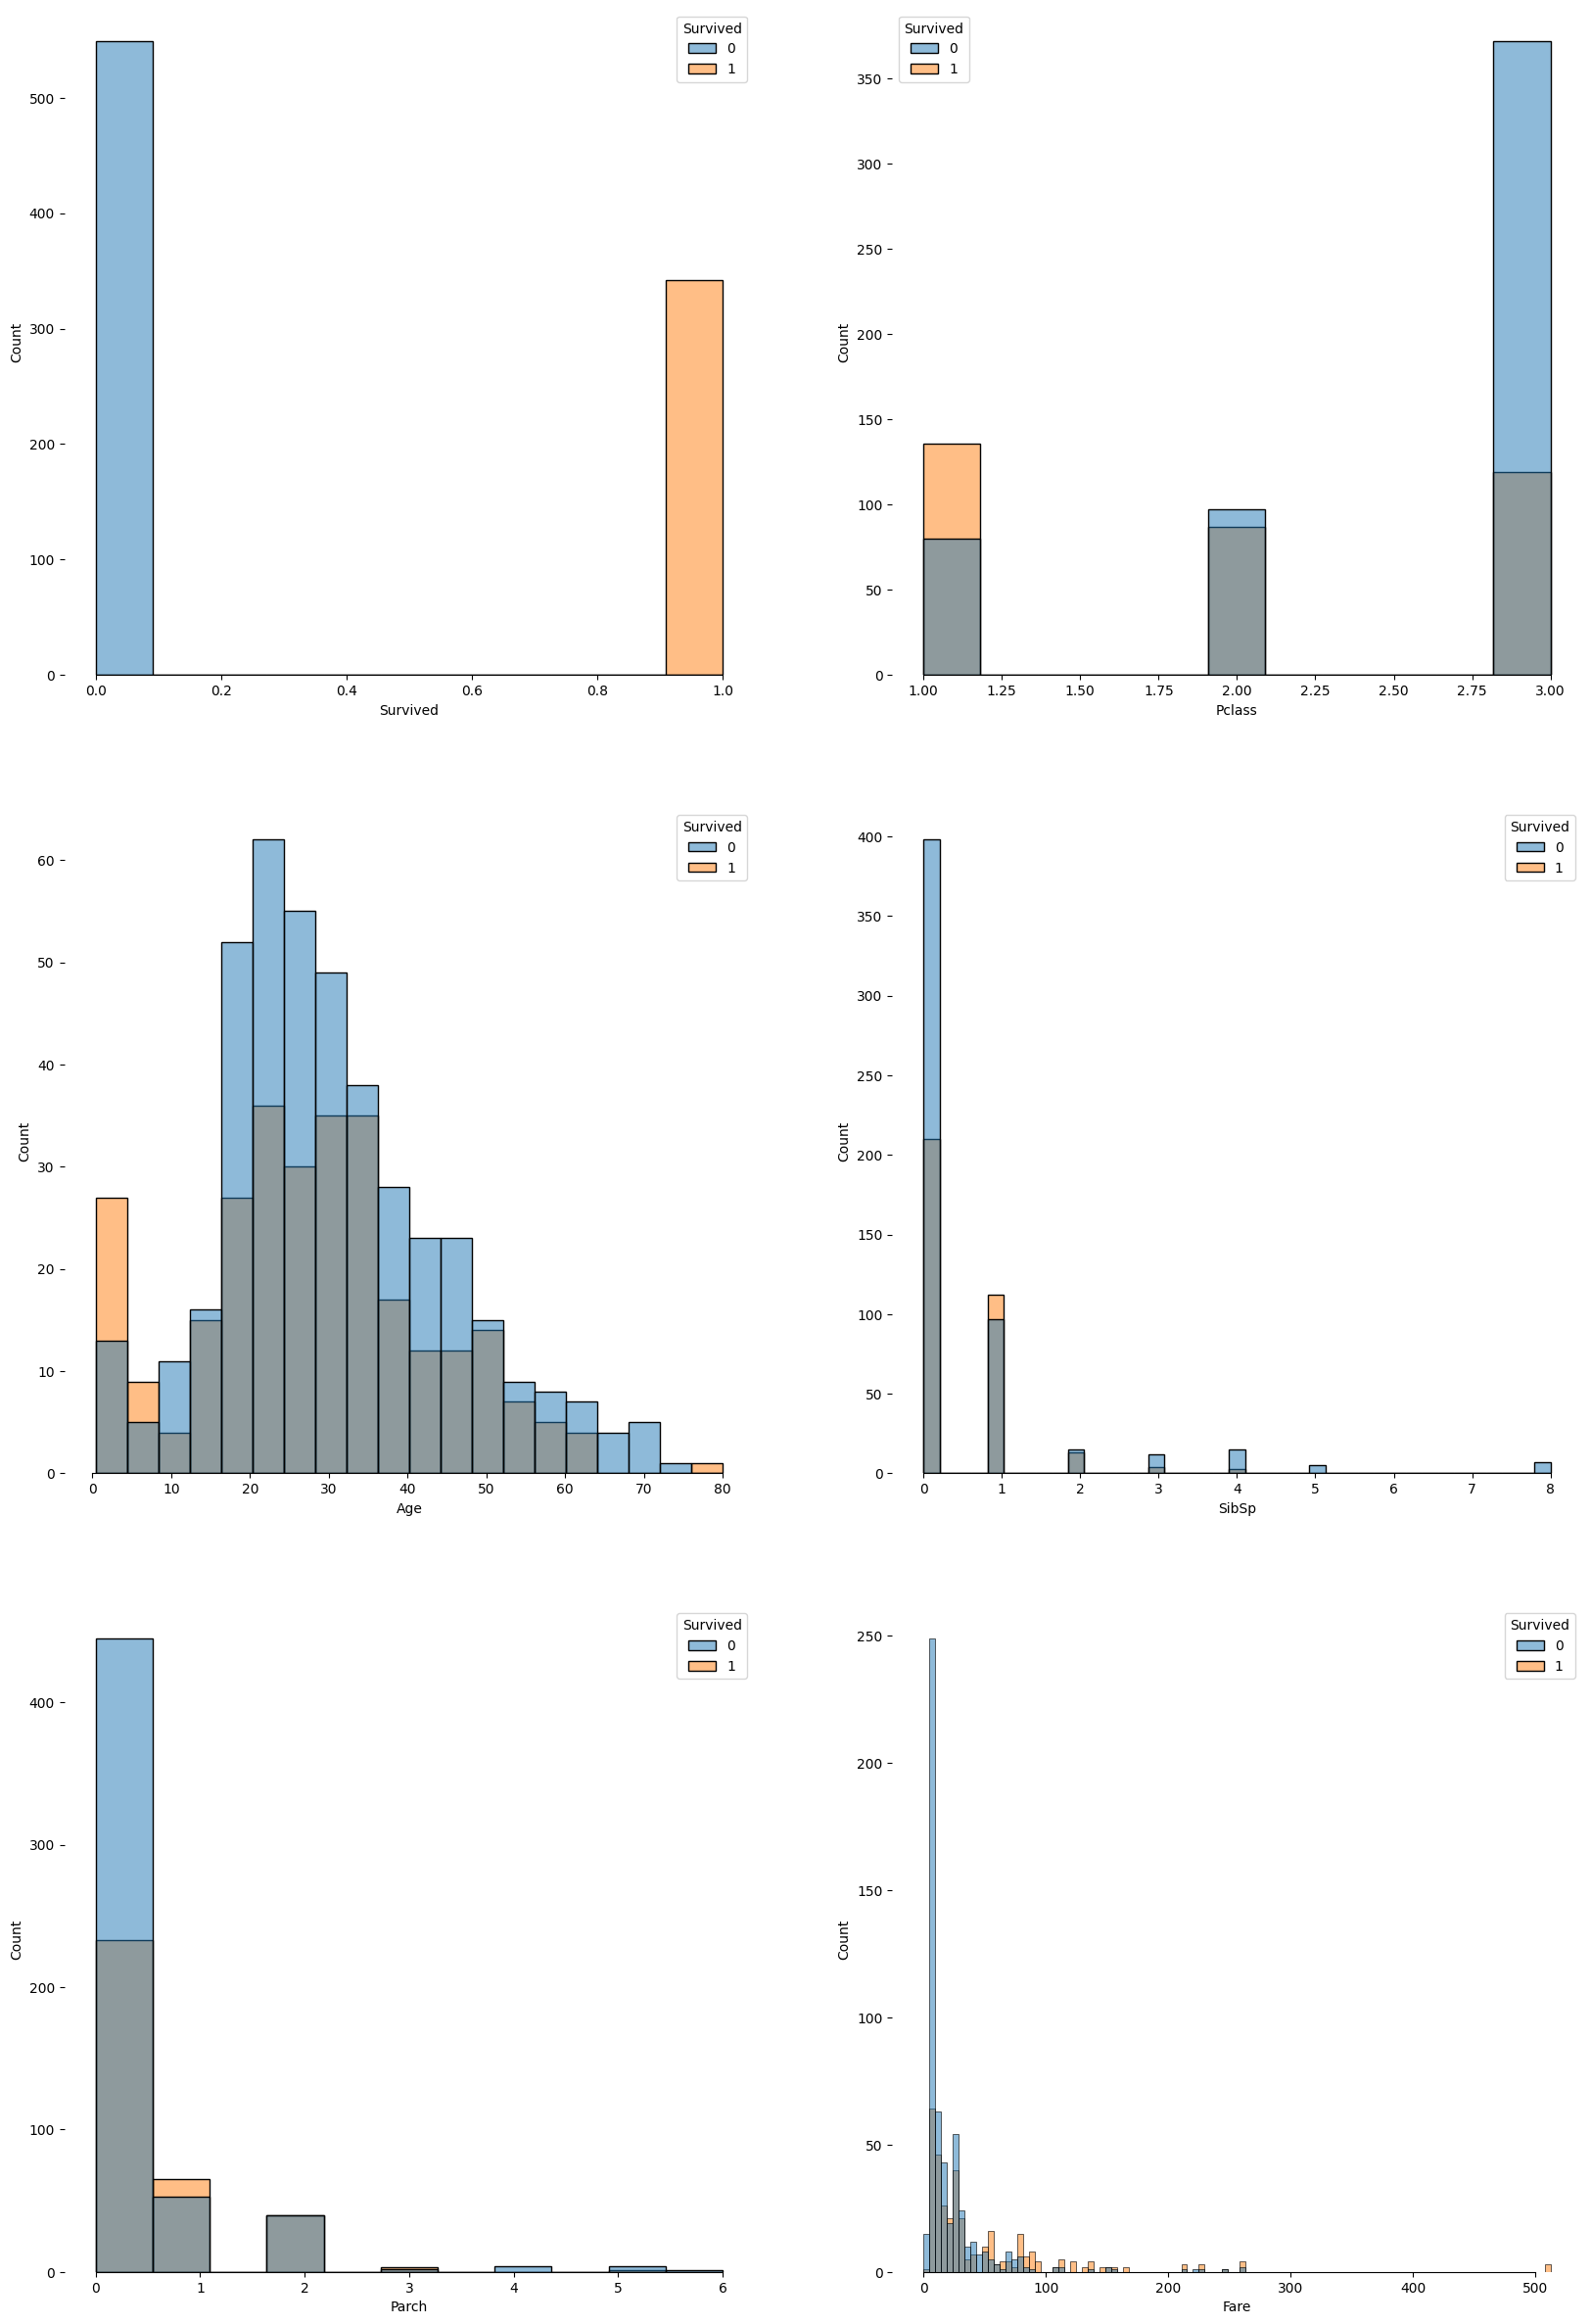

In [ ]:
f, ax = plt.subplots(figsize=(20, 30))
for i in range(1,7):
  plt.subplot(3,2,i)
  sns.histplot(treino, x=coluna_numerica[i], hue='Survived')
  ax.xaxis.grid(True)
  sns.despine(trim=True, left=True)

<ipython-input-22-bcda4fb6d80e>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i)


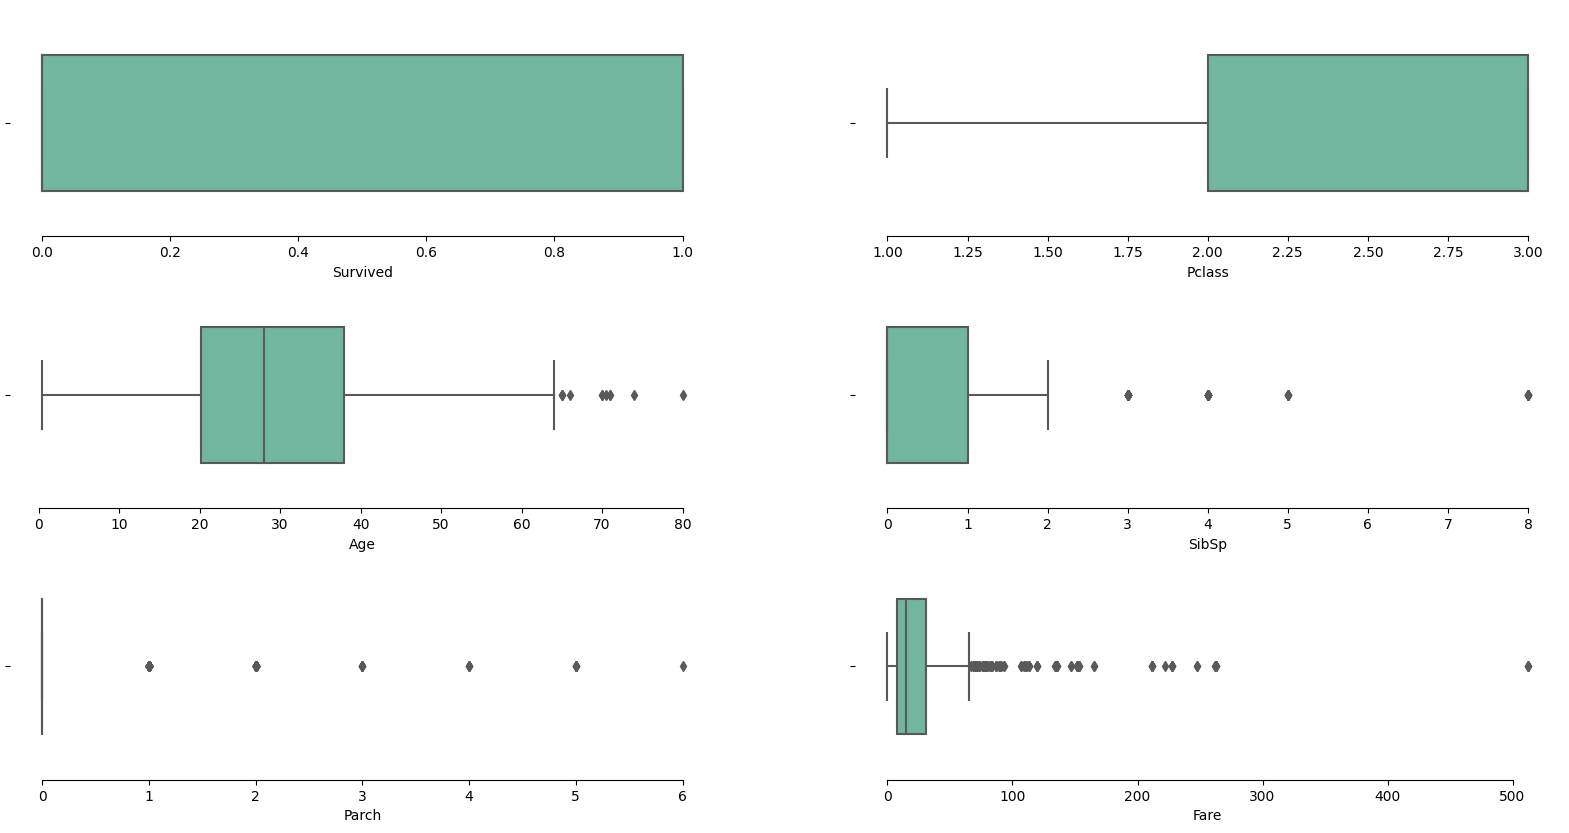

In [ ]:
#Verificar Outliers
f, ax = plt.subplots(figsize=(20, 10))

for i in range(1,7):
  plt.subplot(3,2,i)
  sns.boxplot(x = treino[coluna_numerica[i]], width=.6, palette="BuGn")
  ax.xaxis.grid(True)
  ax.set(ylabel="")
  sns.despine(trim=True, left=True)

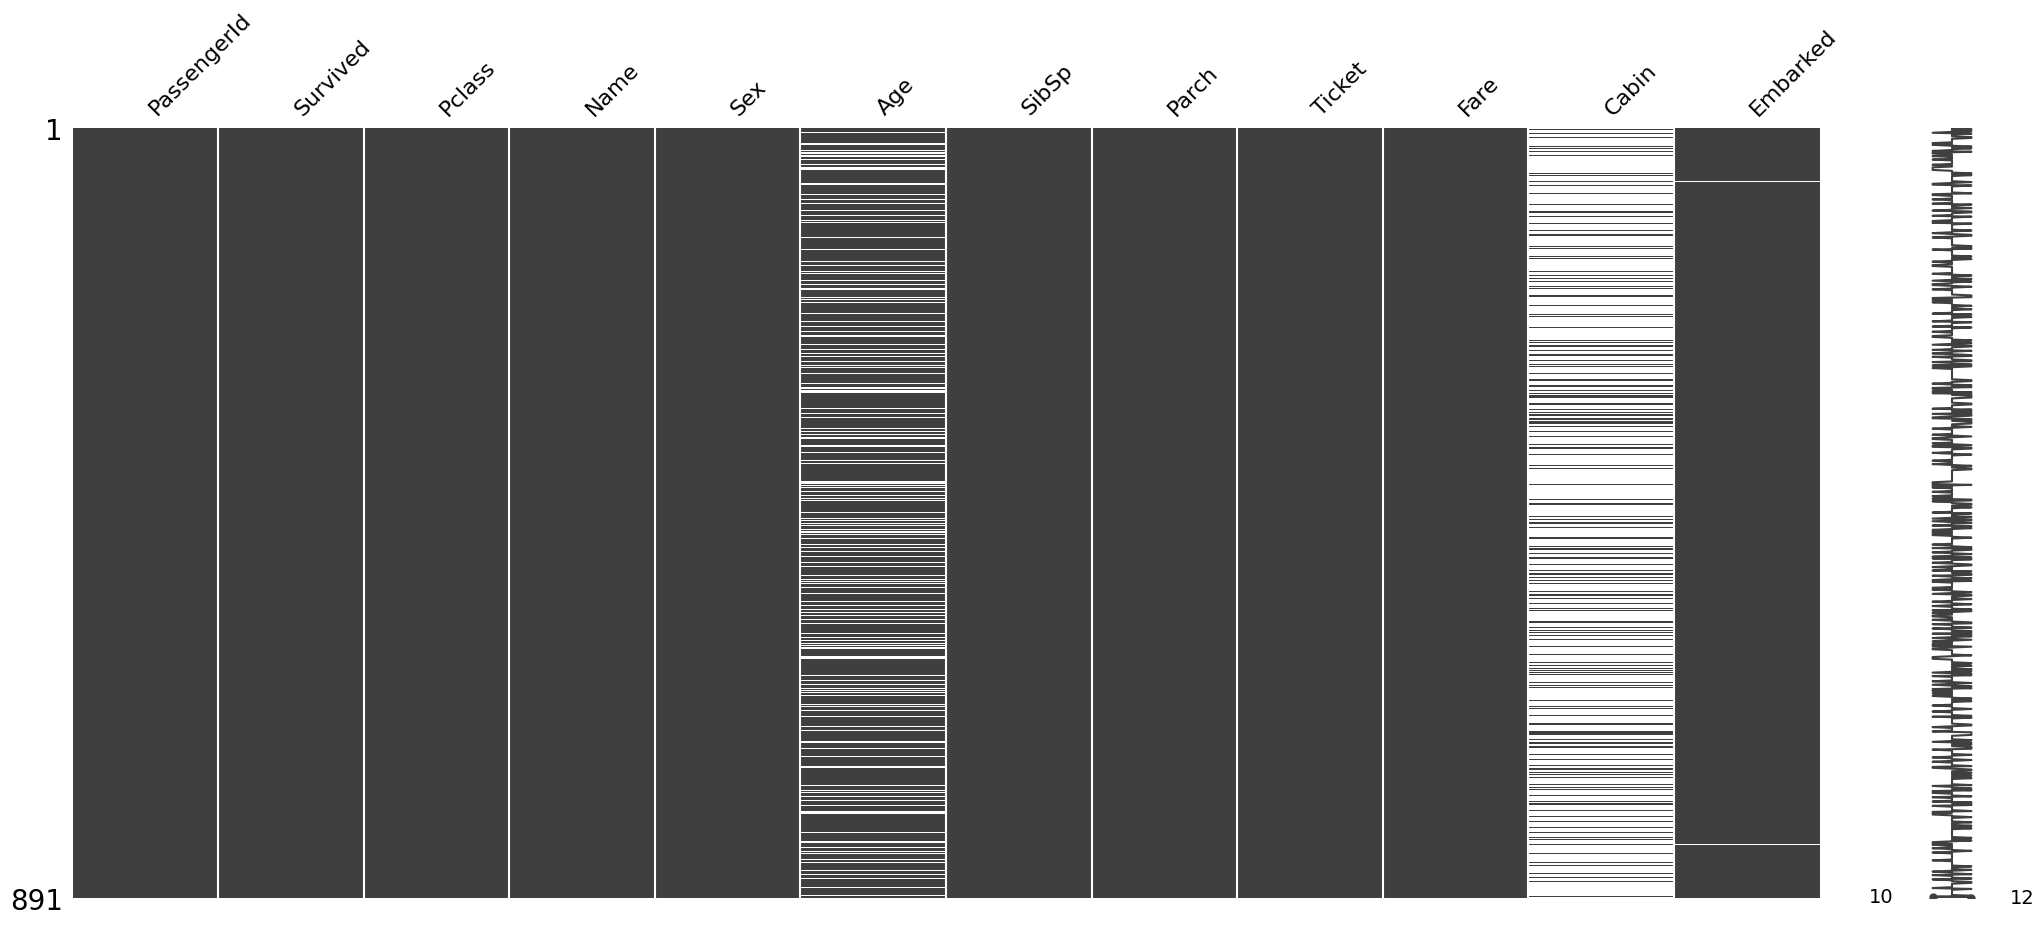

In [ ]:
#Verificar valores faltantes
msno.matrix(treino)
plt.show()

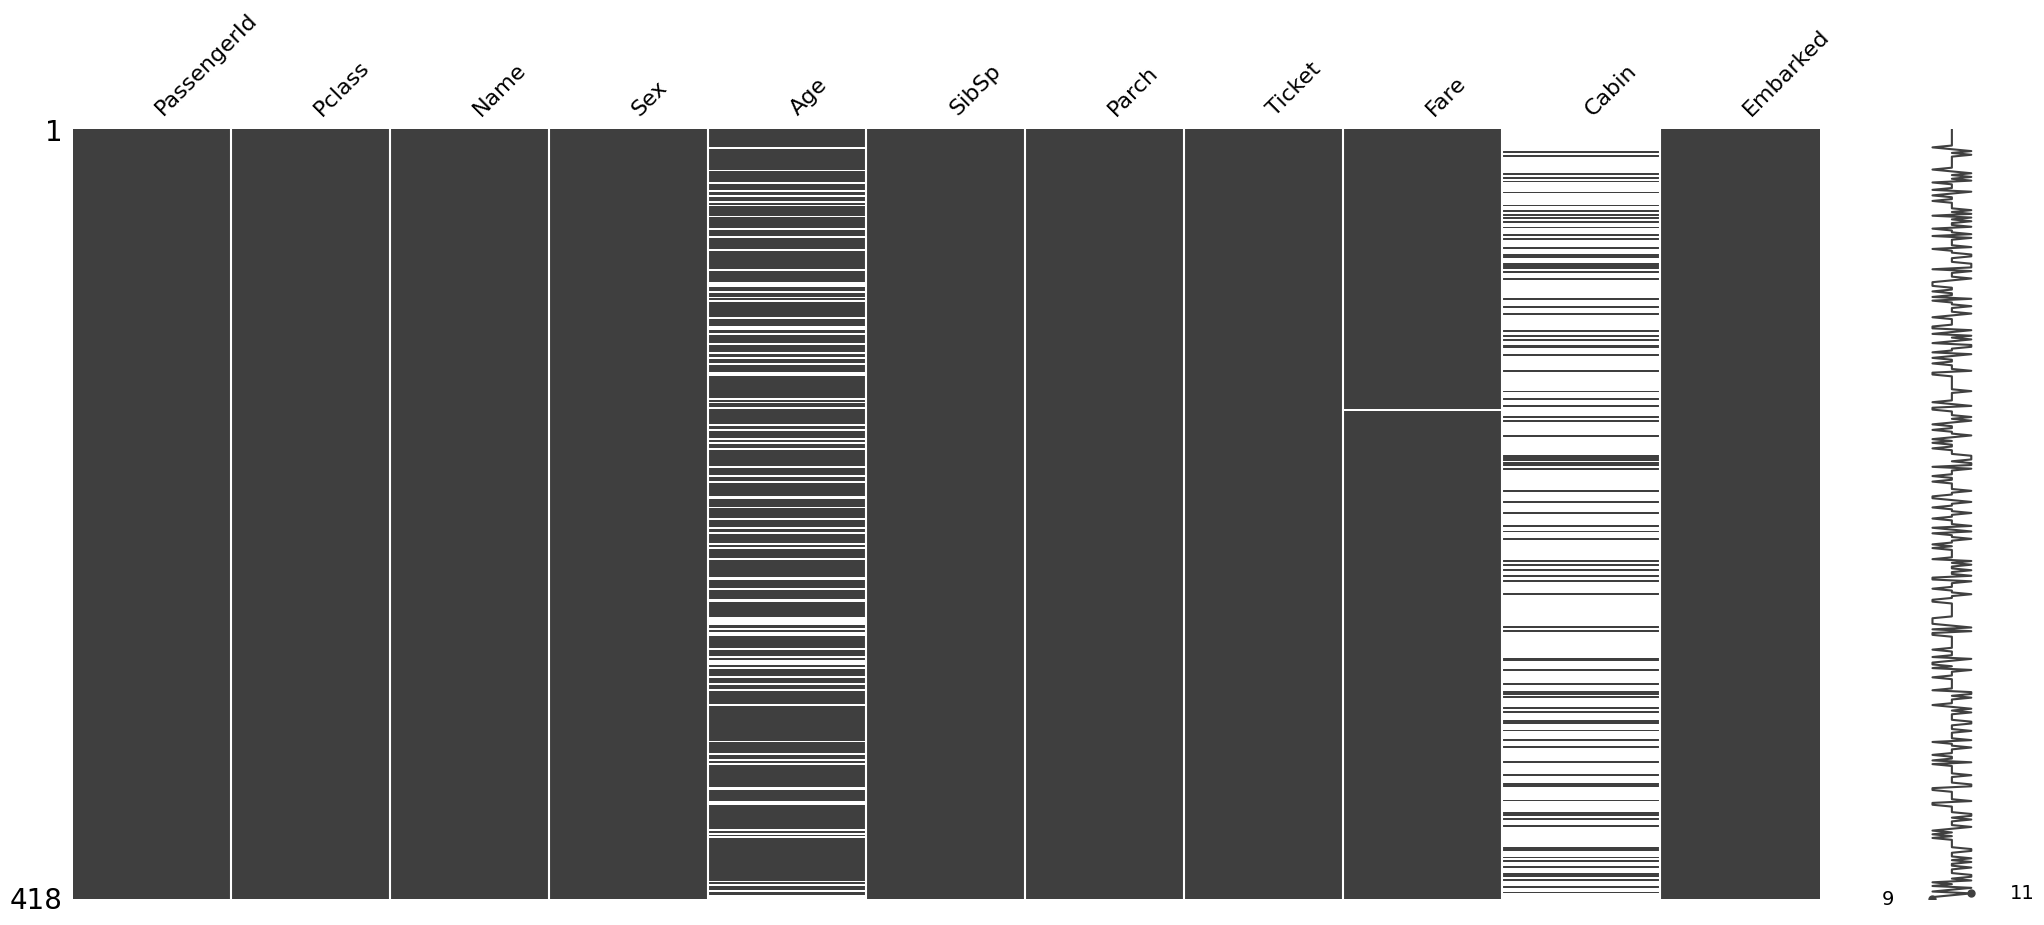

In [ ]:
#Verificar valores faltantes
msno.matrix(teste)
plt.show()

# Engenharia de Variaveis
- tratar faltantes
- utilizar informações de outras colunas
- combinação de informações


In [ ]:
targets = list(treino['Survived']) #atribuição a variável resposta em uma lista separada
len(targets)

891

In [ ]:
#Facilita para aplicar as normalizações e mudanças de variáveis no treino e no teste ao mesmo tempo
dataset = pd.concat([treino, teste]) 

In [ ]:
# mapeando o sexo em 0 e 1 no data set completo
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}) 

In [ ]:
# tranformação de variavel: pegar apenas o titulo presente no nome
def aux(x):
    return x.split(', ')[1].split('. ')[0]

dataset['Titulo'] = dataset['Name'].apply(aux)

In [ ]:
dataset['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [ ]:
#agrupnando as categorias e mapeando-a
#busca de informações sobre qual sentido de agrupar 'classes' de titulação
#busca por mais informações sobre os dados podem gerar melhores resultados
titulos = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

dataset['Titulacao'] = dataset['Titulo'].map(titulos)

In [ ]:
dataset['Survived'].groupby(dataset['Titulacao']).describe()

,count,mean,std,min,25%,50%,75%,max
Titulacao,,,,,,,,
Master,40.0,0.575000,0.500641,0.0,0.0,1.0,1.00,1.0
Miss,184.0,0.701087,0.459031,0.0,0.0,1.0,1.00,1.0
Mr,517.0,0.156673,0.363844,0.0,0.0,0.0,0.00,1.0
Mrs,127.0,0.795276,0.405098,0.0,1.0,1.0,1.00,1.0
Officer,18.0,0.277778,0.460889,0.0,0.0,0.0,0.75,1.0
Royalty,5.0,0.600000,0.547723,0.0,0.0,1.0,1.00,1.0


In [ ]:
# variavel Cabine
dataset['Cabin']

0      n
1      C
2      n
3      C
4      n
      ..
413    n
414    C
415    n
416    n
417    n
Name: Cabin, Length: 1309, dtype: object

In [ ]:
# tranformação de variavel: pegar apenas a primeira letra da variavel Cabin,
# para identificar os nulos e os preenchidos, sabendo qual categoria ela pertence
def aux(x):
    return list(str(x))[0]

dataset['Cabin'] = dataset['Cabin'].apply(aux) 

In [ ]:
#defifindo o tamanho da família
dataset['Familia'] = dataset['SibSp'] + dataset['Parch'] + 1 
#categorizar o tamanho da família pode ajudar nos resultados
def aux(x):
    if x == 1:
        return 'Sozinho'
    elif x <= 4:
        return 'Pequena'
    else:
        return 'Grande' 

dataset['FamiliaTipo'] = dataset['Familia'].apply(aux) #aplica diretamente em todo o dataset

FamiliaTipo
Grande     0.161290
Pequena    0.578767
Sozinho    0.303538
Name: Survived, dtype: float64

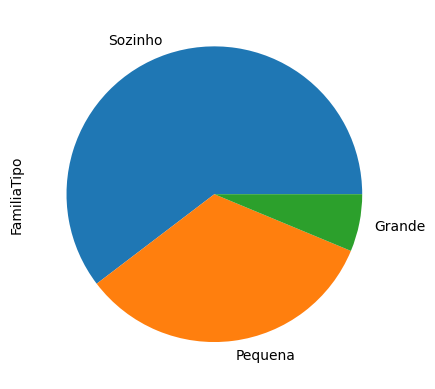

In [ ]:
dataset['FamiliaTipo'].value_counts().plot(kind = 'pie')

dataset['Survived'].groupby(dataset['FamiliaTipo']).mean()

In [ ]:
# Dropando Variaveis que não serão mais utilizadas por terem sido substituidas
variaveis = ['PassengerId', 'Name', 'Ticket', 'Titulo']
dataset.drop(variaveis, axis = 1, inplace = True)

In [ ]:
dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Titulacao,Familia,FamiliaTipo
0,0.0,3,0,22.0,1,0,7.2500,n,S,Mr,2,Pequena
1,1.0,1,1,38.0,1,0,71.2833,C,C,Mrs,2,Pequena
2,1.0,3,1,26.0,0,0,7.9250,n,S,Miss,1,Sozinho
3,1.0,1,1,35.0,1,0,53.1000,C,S,Mrs,2,Pequena
4,0.0,3,0,35.0,0,0,8.0500,n,S,Mr,1,Sozinho


In [ ]:
# Dummificação de várias variáveis de uma unica vez
dummificar = ['Pclass', 'Cabin', 'Embarked', 'Titulacao', 'FamiliaTipo']#lista de variáveis a serem dumificadas
dataset = pd.get_dummies(dataset, columns = dummificar) #função do pandas que faz a dumificação em massa

In [ ]:
dataset.head(5)

,Survived,Sex,Age,SibSp,Parch,Fare,Familia,Pclass_1,Pclass_2,Pclass_3,...,Embarked_S,Titulacao_Master,Titulacao_Miss,Titulacao_Mr,Titulacao_Mrs,Titulacao_Officer,Titulacao_Royalty,FamiliaTipo_Grande,FamiliaTipo_Pequena,FamiliaTipo_Sozinho
0,0.0,0,22.0,1,0,7.2500,2,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1.0,1,26.0,0,0,7.9250,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,2,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.0,0,35.0,0,0,8.0500,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
dataset.isnull().sum()

Survived               418
Sex                      0
Age                    263
SibSp                    0
Parch                    0
Fare                     1
Familia                  0
Pclass_1                 0
Pclass_2                 0
Pclass_3                 0
Cabin_A                  0
Cabin_B                  0
Cabin_C                  0
Cabin_D                  0
Cabin_E                  0
Cabin_F                  0
Cabin_G                  0
Cabin_T                  0
Cabin_n                  0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
Titulacao_Master         0
Titulacao_Miss           0
Titulacao_Mr             0
Titulacao_Mrs            0
Titulacao_Officer        0
Titulacao_Royalty        0
FamiliaTipo_Grande       0
FamiliaTipo_Pequena      0
FamiliaTipo_Sozinho      0
dtype: int64

# Imput de dados Faltantes

In [ ]:
#IMPUTAÇÂO COM KNN em todas colunas os dados faltantes
from sklearn.impute import KNNImputer 

imputer = KNNImputer()#cria um objeto com a instancia KnnImputer

knnimp = imputer.fit(dataset.loc[:n-1, :].drop('Survived', axis = 1))#Faz o treinamento com os dados de treinamento, sem vazar informação

knnimp = imputer.transform(dataset.drop('Survived', axis = 1))#faz o preenchimento no conjutno de treino

In [ ]:
knnimp #este é o data set em formato de numpy array, precisa tranformar em data frame para retornar ao formato original

array([[ 0. , 22. ,  1. , ...,  0. ,  1. ,  0. ],
       [ 1. , 38. ,  1. , ...,  0. ,  1. ,  0. ],
       [ 1. , 26. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 0. , 38.5,  0. , ...,  0. ,  0. ,  1. ],
       [ 0. , 28.6,  0. , ...,  0. ,  0. ,  1. ],
       [ 0. , 16.6,  1. , ...,  0. ,  1. ,  0. ]])

In [ ]:
dataset = pd.DataFrame(knnimp, columns = dataset.columns[1:]) #tranforma novamente em um data frame preenchendo as lacunas
#columns para pegar de volta o nome das colunas que haviam se perdido na imputação

In [ ]:
 dataset.isnull().sum()

Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Familia                0
Pclass_1               0
Pclass_2               0
Pclass_3               0
Cabin_A                0
Cabin_B                0
Cabin_C                0
Cabin_D                0
Cabin_E                0
Cabin_F                0
Cabin_G                0
Cabin_T                0
Cabin_n                0
Embarked_C             0
Embarked_Q             0
Embarked_S             0
Titulacao_Master       0
Titulacao_Miss         0
Titulacao_Mr           0
Titulacao_Mrs          0
Titulacao_Officer      0
Titulacao_Royalty      0
FamiliaTipo_Grande     0
FamiliaTipo_Pequena    0
FamiliaTipo_Sozinho    0
dtype: int64

In [ ]:
#separa novamente o conjunto em treino e teste, depois de todas as modificações feitas
#a variável resposta do treino esta na Target, separada do conjunto
treino = dataset.loc[:n-1, :]
teste = dataset.loc[n:, :]

In [ ]:
treino.shape

(891, 30)

In [ ]:
#faz a normalização subtraindo a média e dividindo pelo desvio padrão
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

aux0 = sc.fit_transform(treino[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])#cria novas colunas idade e tarifa normalizadas
treino = pd.concat([treino, aux1], axis = 1)#adiciona ao conunto de treino
treino.drop(['Age', 'Fare'], axis = 1, inplace = True) #deleta as colunas antigas não padronizadas

In [ ]:
#faz o vazaento de dados para o conjunto de teste, aplicando as mesmas métricas acima
aux0 = sc.transform(teste[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])
teste = teste.reset_index()
teste = pd.concat([teste, aux1], axis = 1)
teste.drop(['Age', 'Fare', 'index'], axis = 1, inplace = True) 

In [ ]:
treino.head()

,Sex,SibSp,Parch,Familia,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,...,Titulacao_Miss,Titulacao_Mr,Titulacao_Mrs,Titulacao_Officer,Titulacao_Royalty,FamiliaTipo_Grande,FamiliaTipo_Pequena,FamiliaTipo_Sozinho,Idade,Tarifa
0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.575796,-0.502445
1,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.598609,0.786845
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.282195,-0.488854
3,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.378408,0.420730
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.378408,-0.486337


# Modelagem

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
modelo_base = RandomForestClassifier(max_depth=3) 
modelo_base.fit(treino, targets) 

RandomForestClassifier(max_depth=3)

In [ ]:
#Array que mostra a importância de cada variável usada para contruir o modelo
modelo_base.feature_importances_

array([2.11214582e-01, 7.91874211e-03, 4.91706264e-03, 2.86696320e-02,
       3.84389029e-02, 6.33998798e-03, 8.59791614e-02, 9.07662076e-04,
       6.38992231e-03, 1.79035989e-03, 2.43941541e-03, 9.21718911e-03,
       3.84299687e-04, 6.62219863e-05, 0.00000000e+00, 5.70475671e-02,
       6.94670174e-03, 4.32575215e-03, 3.49995053e-03, 5.93498397e-03,
       5.93016448e-02, 2.31026390e-01, 7.55999297e-02, 1.44932421e-03,
       1.93427637e-04, 2.41163032e-02, 1.31164695e-02, 1.21344663e-02,
       3.53880175e-02, 6.52459297e-02])

In [ ]:
variaveis = pd.DataFrame()#tranforma em um data frame para melhor visualização
variaveis['variavel'] = treino.columns#pega os nome das colunas
variaveis['importância'] = modelo_base.feature_importances_#atribui os valores
variaveis.sort_values(by = "importância", ascending = False).reset_index(drop=True)#organiza por ordem decrescente de importância

,variavel,importância
0,Titulacao_Mr,0.231026
1,Sex,0.211215
2,Pclass_3,0.085979
3,Titulacao_Mrs,0.075600
4,Tarifa,0.065246
5,Titulacao_Miss,0.059302
6,Cabin_n,0.057048
7,Pclass_1,0.038439
8,Idade,0.035388
9,Familia,0.028670


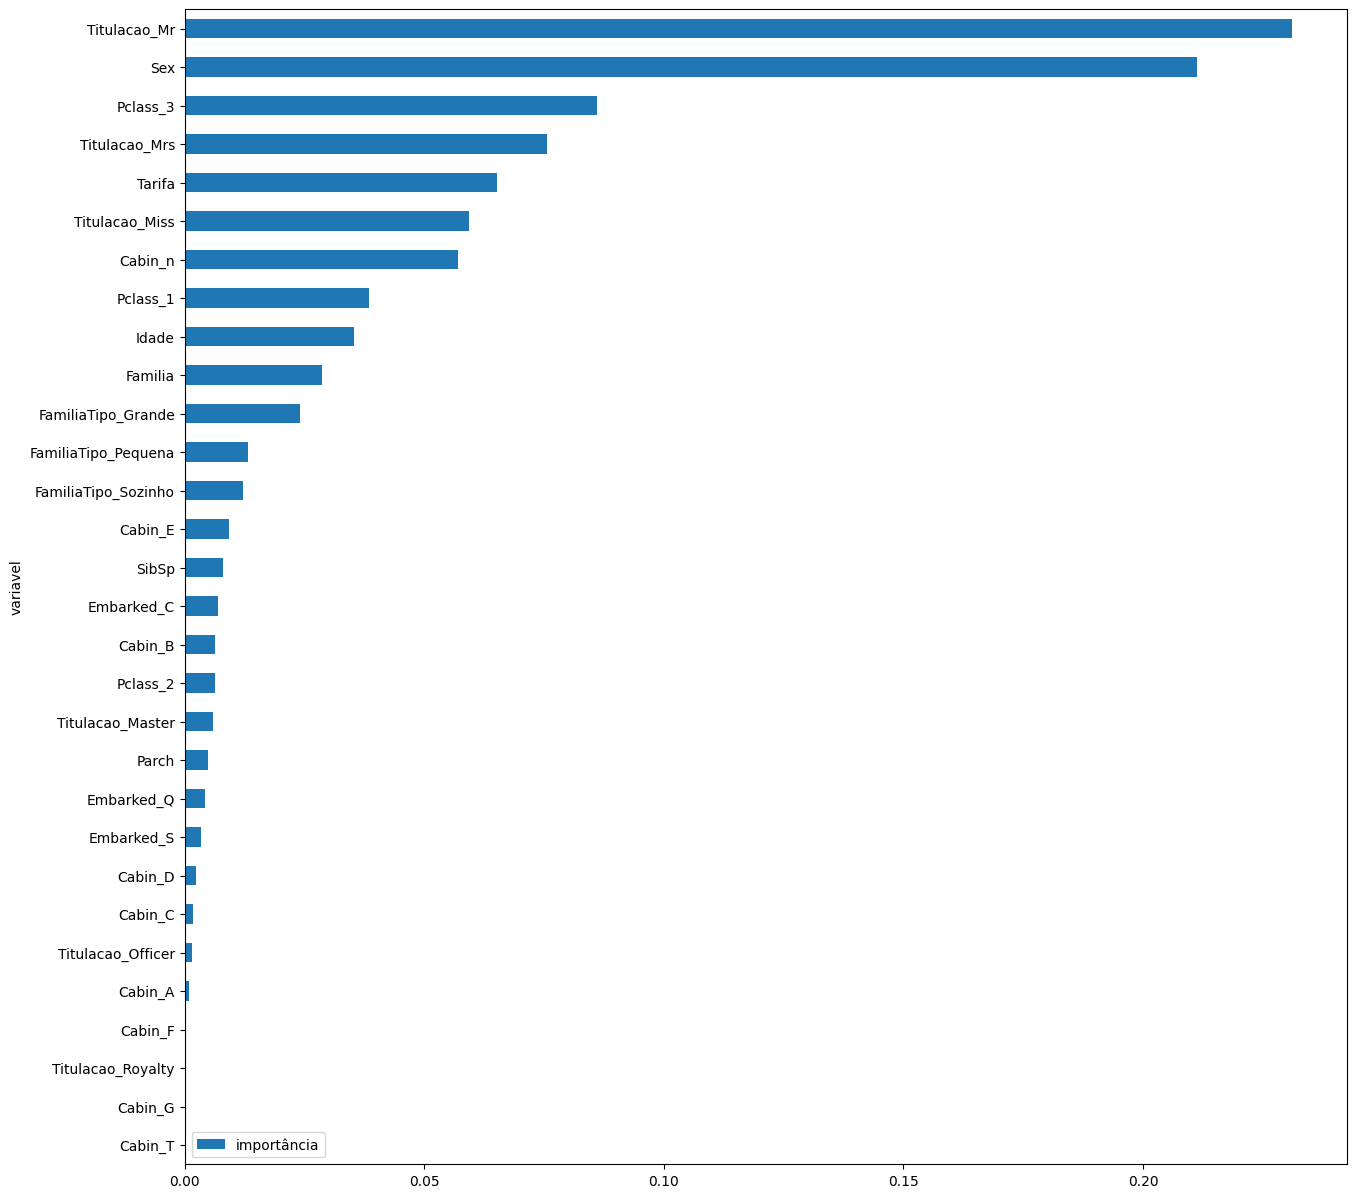

In [ ]:
#Traz de forma grafica para melhor vizualisção
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(15, 15));

#Selecionando as variáveis mais importantes

In [ ]:
from sklearn.feature_selection import SelectFromModel
#Seleciona a quantidade de variaveis
seletor = SelectFromModel(modelo_base, prefit = True, max_features = 11, threshold = -np.inf)#modelo base, prefit , max_features = maximo de variáveis

treino_reduzido = seletor.transform(treino)#filtra o conjunto de dados baseado no select
print(treino_reduzido.shape) 

teste_reduzido = seletor.transform(teste)#filtra o conjunto de dados para o teste
print(teste_reduzido.shape)

(891, 11)
(418, 11)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


#Grid Search

In [ ]:
#modelos de classificação
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold#a proporção das variáveis resposta são mantidas

from sklearn.model_selection import GridSearchCV#procura em Grid em validação cruzada

In [ ]:
%%time
parametros = {   
              'max_depth' : [6, 8, 10, 12, 14, 16, 18], #profundidade com 5 parametros
              'n_estimators': [50, 100, 150], # Tamnaho da Floresta
              'max_features': ['sqrt', 'auto', 'log2'], #tamanho do numero de colunas usados para montar a arvore
              'min_samples_split': [2, 4, 10, 16, 20], #minimo de amostras no nó
              #'min_samples_leaf': [1, 3, 5], #minimo de amostras nas folhas
              #'bootstrap': [True, False] #se vai fazer boostrap dos dados
              }

modelo = RandomForestClassifier()        
validacao = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5)
grid_search = GridSearchCV(modelo, param_grid = parametros,
                          scoring = 'accuracy', cv = validacao, 
                          verbose = 10, n_jobs = -1)
grid_search.fit(treino_reduzido, targets) 

melhor_rf = grid_search.best_estimator_

print('\nAcuracia: {:.4f}'.format(grid_search.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_search.best_params_))

Fitting 25 folds for each of 315 candidates, totalling 7875 fits

Acuracia: 0.8382
Melhores parâmetros: {'max_depth': 18, 'max_features': 'log2', 'min_samples_split': 20, 'n_estimators': 50}

CPU times: user 15.3 s, sys: 1.47 s, total: 16.8 s
Wall time: 16min 13s


In [ ]:
Acuracia: 0.8382
Melhores parâmetros: {'max_depth': 18, 'max_features': 'log2', 'min_samples_split': 20, 'n_estimators': 50}

CPU times: user 15.3 s, sys: 1.47 s, total: 16.8 s
Wall time: 16min 13s

# Retreino do modelo Hipertunado para predição final

In [ ]:
rf = RandomForestClassifier(max_depth=18, max_features='log2', min_samples_split=20, n_estimators=50)
rf.fit(treino_reduzido, targets) 

RandomForestClassifier(max_depth=18, max_features='log2', min_samples_split=20,
                       n_estimators=50)

In [ ]:
pred = rf.predict(teste_reduzido)

# Submissão para kaggle


In [ ]:
#Tenho que ler o dataset de novo, pois dropei a coluna de passengerID
url = 'https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/Titanic/test.csv' 
subm = pd.read_csv(url, usecols = ['PassengerId'] )  
subm['Survived'] = pred

subm.to_csv('Titanic_bee' + '.csv', index = False)  